# Площадь под графиком и управление порогом
## Цель работы
Научиться применять кривые PR и ROC для оценки моделей классификации, использовать их для выбора оптимального порога классификации

## Содержание работы
1. Сгенерируйте датасет для бинарной классификации, обучите на нем модель логистической регрессии и постройте для этой модели кривые ROC и PR.
2. Вычислите для этой модели метрики площади под кривыми (ROC-AUC и PR-AUC).
3. Обучите на том же датасете другую модель и сравните ее эффективность по кривым и по метрикам.
4. Сгенерируйте датасет для бинарной классификации с большим дисбалансом классов, обучите на нам ту же модель и постройте кривые.
5. Используйте данные, вычисленные для построения кривых для нахождения оптимального значения порога модели. Постройте матрицу классификации для модели с порогом по умолчанию и с лучшим порогом. Сравните результаты.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### 1. Сгенерируйте датасет для бинарной классификации, обучите на нем модель логистической регрессии и постройте для этой модели кривые ROC и PR.

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [5]:
model = LogisticRegression().fit(X_train, y_train)

In [6]:
y_pred_proba = model.predict_proba(X_test)

In [7]:
y_pred_proba

array([[4.02958497e-03, 9.95970415e-01],
       [2.00643855e-03, 9.97993561e-01],
       [9.94696564e-01, 5.30343592e-03],
       [8.47909962e-01, 1.52090038e-01],
       [1.66614096e-03, 9.98333859e-01],
       [4.99240075e-01, 5.00759925e-01],
       [9.80208762e-01, 1.97912375e-02],
       [9.76507391e-01, 2.34926092e-02],
       [1.79866697e-02, 9.82013330e-01],
       [2.93132539e-01, 7.06867461e-01],
       [9.95836132e-01, 4.16386810e-03],
       [2.53456369e-01, 7.46543631e-01],
       [9.92314475e-01, 7.68552501e-03],
       [3.80237693e-02, 9.61976231e-01],
       [6.47256719e-02, 9.35274328e-01],
       [1.91873737e-01, 8.08126263e-01],
       [8.55142720e-01, 1.44857280e-01],
       [4.34150814e-02, 9.56584919e-01],
       [8.43060465e-01, 1.56939535e-01],
       [5.51009943e-02, 9.44899006e-01],
       [1.32996996e-01, 8.67003004e-01],
       [5.89343759e-01, 4.10656241e-01],
       [9.79492824e-01, 2.05071761e-02],
       [3.32717535e-01, 6.67282465e-01],
       [9.957351

### 2. Вычислите для этой модели метрики площади под кривыми (ROC-AUC и PR-AUC).

In [8]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc, classification_report
import matplotlib.pyplot as plt

In [9]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

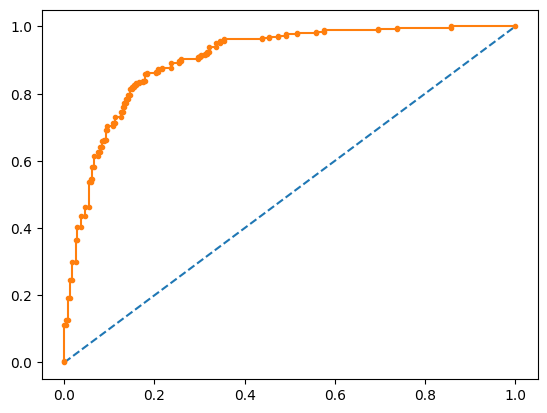

In [10]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [11]:
roc_auc_score(y_test, y_pred_proba[:, 1])

np.float64(0.9027724358974359)

In [12]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

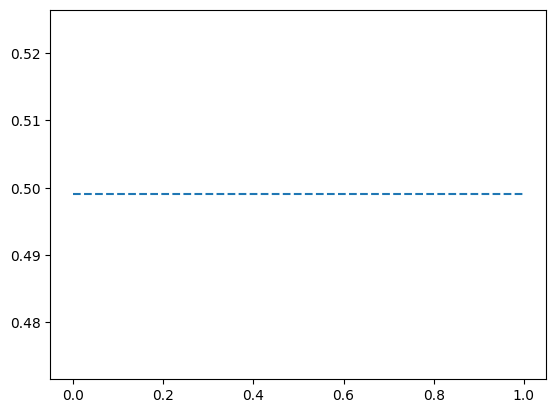

In [13]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')

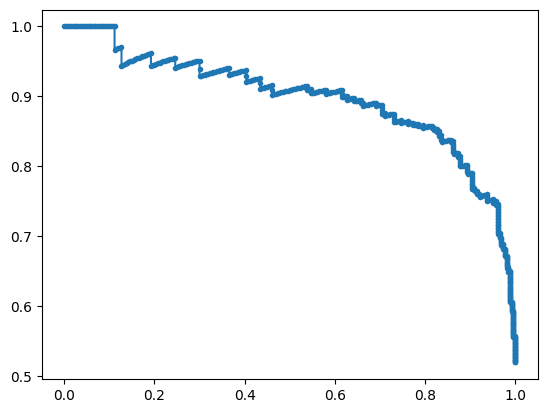

In [14]:
plt.plot(recall, precision, marker='.')
plt.show()

In [15]:
auc(recall, precision)

np.float64(0.897662372903334)

In [16]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



### 3. Обучите на том же датасете другую модель и сравните ее эффективность по кривым и по метрикам.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

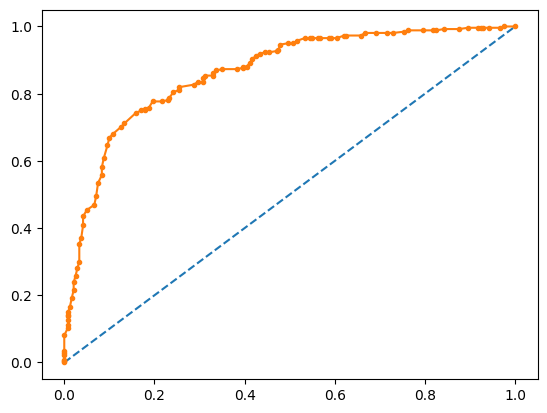

In [18]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [19]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

np.float64(0.8630608974358974)

### 4. Сгенерируйте датасет для бинарной классификации с большим дисбалансом классов, обучите на нам ту же модель и постройте кривые.

In [20]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

In [23]:
print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=493, Class1=7
Тестовая: Class0=492, Class1=8


In [24]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [25]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       492
           1       0.00      0.00      0.00         8

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.98      0.98       500



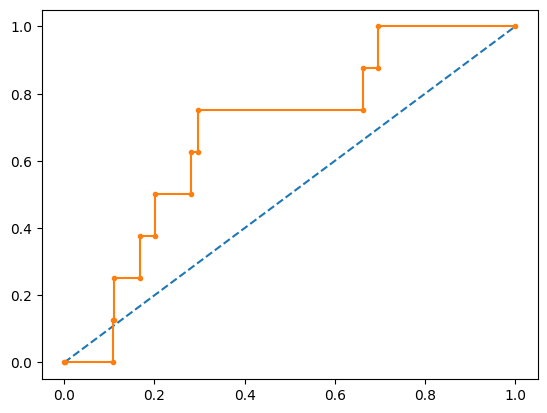

In [26]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [27]:
roc_auc_score(y_test, y_pred_proba[:, 1])

np.float64(0.6847052845528455)

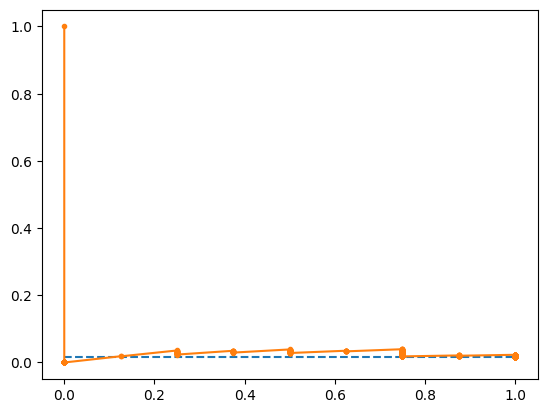

In [28]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [29]:
auc(recall, precision)

np.float64(0.026050159183645463)

### 5. Используйте данные, вычисленные для построения кривых для нахождения оптимального значения порога модели. Постройте матрицу классификации для модели с порогом по умолчанию и с лучшим порогом. Сравните результаты.

In [30]:
from numpy import argmax

In [31]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

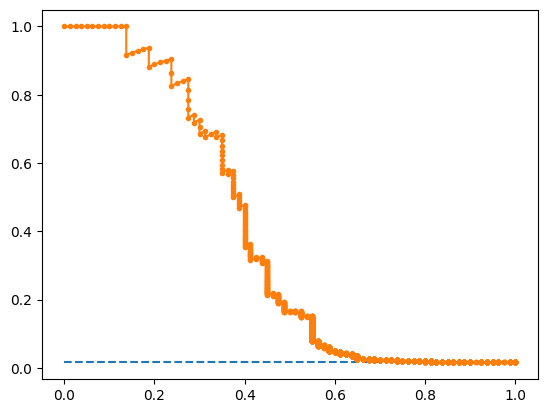

In [32]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

In [33]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]

np.float64(0.24589391299768998)

In [34]:
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.245894, F-Score=0.463


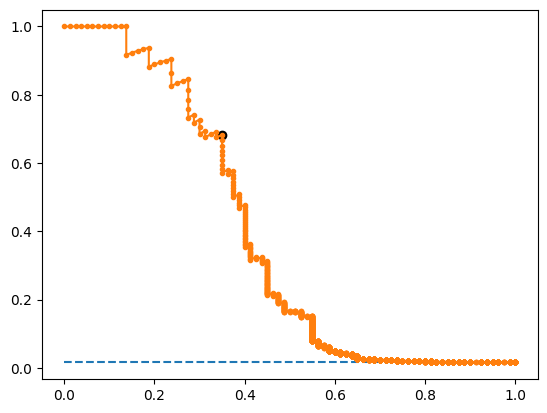

In [35]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [36]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.68      0.34      0.45        80

    accuracy                           0.99      5000
   macro avg       0.83      0.67      0.72      5000
weighted avg       0.98      0.99      0.98      5000



In [38]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.89      0.21      0.34        80

    accuracy                           0.99      5000
   macro avg       0.94      0.61      0.67      5000
weighted avg       0.99      0.99      0.98      5000



Модель с порогом по умолчанию показывает лучший результат нежеле чем с порогом 

## Задания для самостоятельного выполнения

### 1. Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.

In [39]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_probs = model.predict_proba(X_test)[:, 1]

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

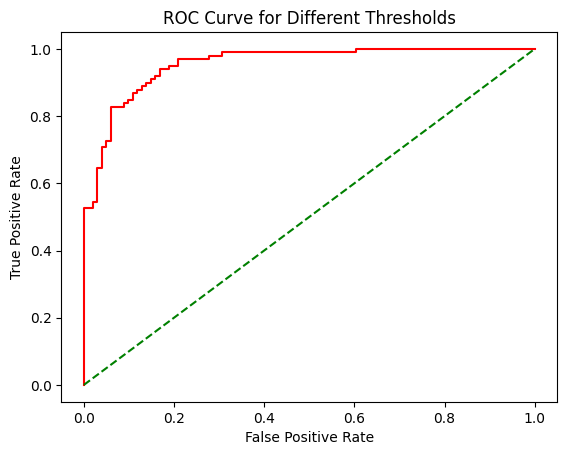

In [44]:
plt.plot(fpr, tpr, label='ROC Curve', color = 'red')
plt.plot([0, 1], [0, 1], linestyle='--', color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Thresholds')
plt.show()

In [45]:
roc_auc_score(y_test, y_probs)

np.float64(0.9545954595459546)

### 2. Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.

In [46]:
from sklearn.datasets import load_breast_cancer

In [47]:
data = load_breast_cancer()
X = data.data
y = data.target

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_probs = model.predict_proba(X_test)[:, 1]

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

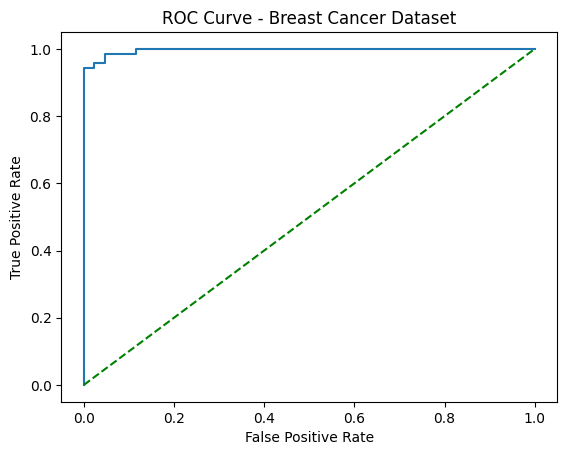

In [52]:
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Breast Cancer Dataset')
plt.show()

In [53]:
roc_auc_score(y_test, y_probs)

np.float64(0.9967245332459875)

### 3. В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.

In [54]:
geom_mean = np.sqrt(tpr * (1 - fpr))
optimal_threshold_index = np.argmax(geom_mean)
optimal_threshold = thresholds[optimal_threshold_index]

In [55]:
optimal_threshold

np.float64(0.8583378190553643)

### 4. При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.

In [56]:
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probs)

In [57]:
precision_optimal_threshold = pr_thresholds[np.argmax(precision)]

In [58]:
recall_optimal_threshold = pr_thresholds[np.argmax(recall)]

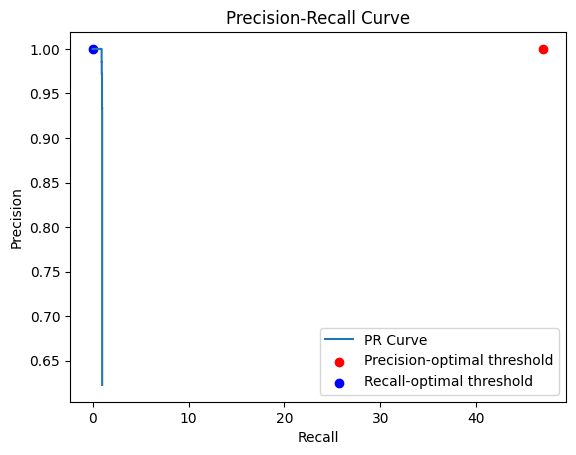

In [59]:
plt.plot(recall, precision, label='PR Curve')
plt.scatter(np.argmax(precision), precision[np.argmax(precision)], color='red', label='Precision-optimal threshold')
plt.scatter(np.argmax(recall), recall[np.argmax(recall)], color='blue', label='Recall-optimal threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [60]:
precision_optimal_threshold, recall_optimal_threshold

(np.float64(0.8583378190553643), np.float64(1.1405585440453243e-26))

### 5. Постройте классификационные кривые для задачи множественной классификации. Проинтерпретируйте результат.

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris

In [62]:
data = load_iris()
X = data.data
y = data.target

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
y_pred = rf.predict(X_test)

In [66]:
cm = confusion_matrix(y_test, y_pred)

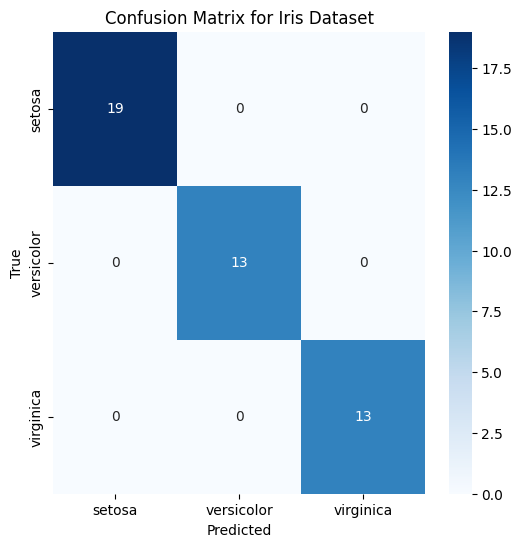

In [67]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Iris Dataset')
plt.show()